<h2 align="center" style="color:yellow;">
  :::::  LONDON BIKE ANALYSIS  :::::
</h2>


<h3 align="center" style="color:yellow;">
  Importing the Python tools for data analysis
</h3>


<h4 align="center" style="color:gray;">
  -------------------------------------
</h4>


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 12
os.makedirs("plots" , exist_ok=True)

<h4 align="center" style="color:yellow;">
  Reading the dataset
</h4>


In [19]:
bikes = pd.read_csv("/home/ds777/Desktop/London-Bike-Analysis/london_merged.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/ds777/Desktop/London-Bike-Analysis/london_merged.csv'

<h4 align="center" style="color:yellow;">
  Sample of the dataset
</h4>


In [ ]:
bikes.sample()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
6962,2015-10-22 09:00:00,2256,14.0,14.0,79.5,19.5,3.0,0.0,0.0,2.0


<h4 align="center" style="color:yellow;">
  Sizeof the dataset
</h4>


In [ ]:
bikes.shape

(17414, 10)

In [ ]:
bikes.head(7)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0


<h4 align="center" style="color:yellow;">
  Search for the Null Data
</h4>


In [ ]:
bikes.isnull().all()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

In [ ]:
bikes.isnull().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

<h4 align="center" style="color:yellow;">
  Display the Unique Values
</h4>


<h5 align="center" style="color:gray;">
  :: 1 :: Weather Code 
</h5>


In [ ]:
bikes.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

<h5 align="center" style="color:gray;">
  :: 2 :: Weather Code 
</h5>


In [ ]:
bikes.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

<h4 align="center" style="color:yellow;">
  Specifying the columns name 
</h4>


In [ ]:
bikes.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [ ]:
bikes = bikes.rename(columns ={
    'timestamp':'time' , 'cnt' : 'count' , 't1' : 'temp_real_c' ,'t2':'temp_feels_like_c',
    'hum':'humidity_percent' , 'wind_speed' : 'wind_speed_kph','weather_code':'weather',
    'is_holiday':'is_holiday','is_weekend':'is_weekend','season':'season' 
})

In [ ]:
bikes.columns

Index(['time', 'count', 'temp_real_c', 'temp_feels_like_c', 'humidity_percent',
       'wind_speed_kph', 'weather', 'is_holiday', 'is_weekend', 'season'],
      dtype='object')

<h4 align="center" style="color:yellow;">
  Changing Humidity_Percent / 100
</h4>


In [ ]:
bikes.humidity_percent = bikes.humidity_percent / 100

<h4 align="center" style="color:yellow;">
   Creating Dictionaries to map the data to the actual values   
</h4>


<h5 align="center" style="color:gray;">
  :: 1 :: Creating Seaon Dictionary 
</h5>


In [ ]:
season_dict ={
    '0.0' : 'spring',
    '0.1' : 'summer',
    '0.2' : 'fall',
    '0.4' : 'winter'
}


<h5 align="center" style="color:gray;">
  :: 2 :: Creating Weather Dictionary 
</h5>


In [ ]:
weather_dict = {
    '1.0' : 'Clear',
    '2.0' : 'Scatterd clouds',
    '3.0' : 'Broken clouds',
    '4.0' : 'Cloudy',
    '5.0' : 'Rain',
    '6.0' : 'Rain with thunderstone',
    '0.7' : 'showfall'
}

<h4 align="center" style="color:yellow;">
  Changing The Datatype of Some Columns 
</h4>


<h5 align="center" style="color:gray;">
  :: 1 :: Changing the Seasons Column datatype to string 
</h5>


In [ ]:
bikes.season = bikes.season.astype(str)

<h5 align="center" style="color:gray;">
  :: 1.1:: Mapping the values to the actual written seasons
</h5>


In [ ]:
bikes.season = bikes.season.map(season_dict)

<h5 align="center" style="color:gray;">
  :: 2 :: Changing the Sweather Column datatype to string 
</h5>


In [ ]:
bikes.weather = bikes.weather.astype(str)

<h5 align="center" style="color:gray;">
  :: 2.1:: Mapping the values to the actual written weathers
</h5>


In [ ]:
bikes.weather = bikes.weather.map(weather_dict)

<h5 align="center" style="color:gray;">
  :: 3:: Display the Dataset to see the mapping 
</h5>


In [ ]:
bikes.head(3)

,time,count,temp_real_c,temp_feels_like_c,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,NaN
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,NaN
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,NaN


<h5 align="center" style="color:gray;">
  :: 4:: Save and Export the Clean dataframe to an excel file that we will use in Tableau
</h5>


In [ ]:
bikes.to_excel("london_bikes_clean.xlsx" , sheet_name='Data')

In [ ]:
new_bikes = pd.read_excel("/home/ds777/Desktop/Git_Hub/London-Bike-Analysis/London-Bike-Analysis/london_bikes_clean.xlsx")

In [ ]:
new_bikes.head(5)

,Unnamed: 0,time,count,temp_real_c,temp_feels_like_c,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0,1,NaN
1,1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0,1,NaN
2,2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0,1,NaN
3,3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0,1,NaN
4,4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0,1,NaN


In [ ]:
new_bikes['time'] = pd.to_datetime(new_bikes['time'])


In [ ]:
new_bikes.isnull().sum()

Unnamed: 0               0
time                     0
count                    0
temp_real_c              0
temp_feels_like_c        0
humidity_percent         0
wind_speed_kph           0
weather               2215
is_holiday               0
is_weekend               0
season               13020
dtype: int64

<h3 align="center" style="color:yellow;">
  DATA VISUALIZATION
</h3>


<h4 align="center" style="color:yellow;">
  :: 1 :: Bike Rentals Over Time ( Trend )
</h4>


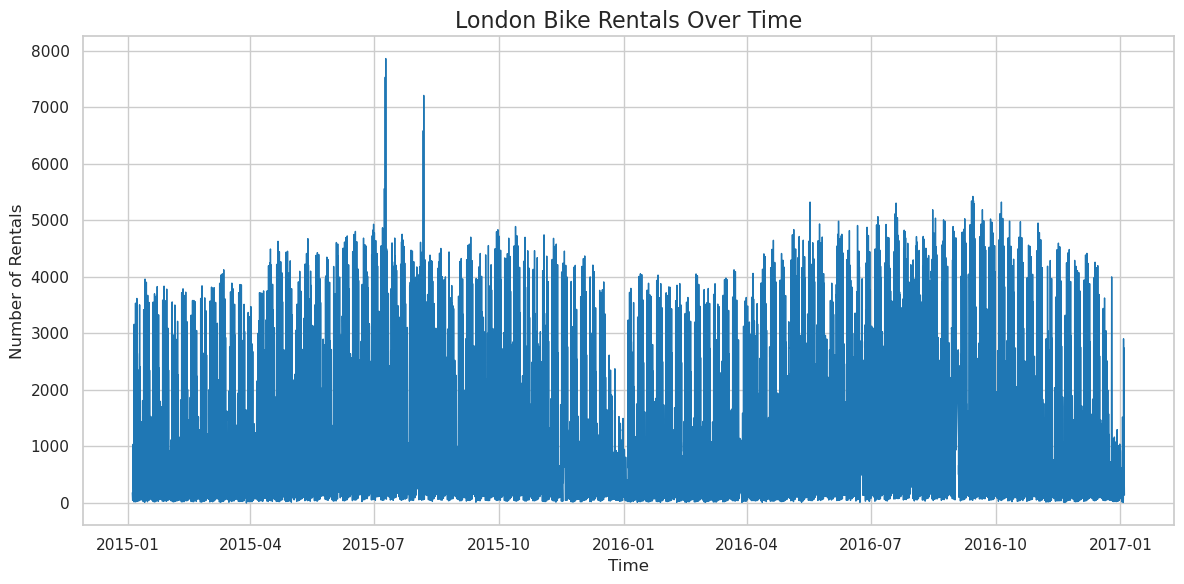

In [21]:
plt.figure()
plt.plot(new_bikes['time'], new_bikes['count'], color="#1f77b4", linewidth=1)
plt.title("London Bike Rentals Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Rentals")
plt.tight_layout()
plt.savefig("plots/01_rentals_over_time.png", dpi=300)
plt.show()


<h4 align="center" style="color:yellow;">
  :: 2 :: Rolling Average Trend
</h4>


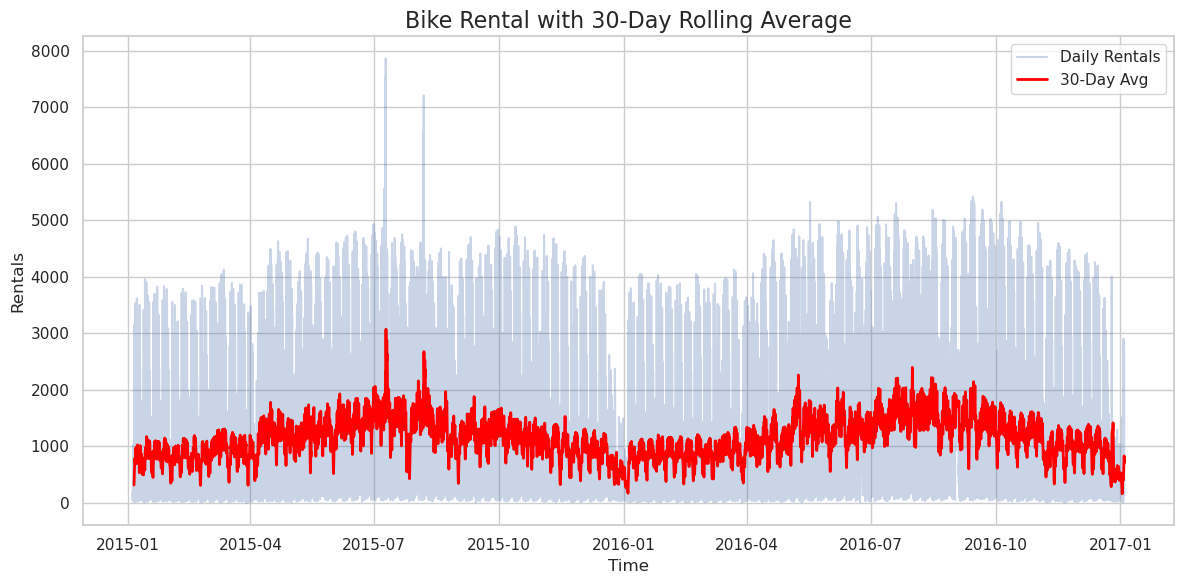

In [23]:
new_bikes['rolling_30'] = new_bikes['count'].rolling(30).mean()

plt.figure()
plt.plot(new_bikes['time'], new_bikes['count'] , alpha=0.3 , label='Daily Rentals')
plt.plot(new_bikes['time'], new_bikes['rolling_30'],color='red', linewidth=2,label='30-Day Avg')
plt.title("Bike Rental with 30-Day Rolling Average")
plt.xlabel("Time")
plt.ylabel("Rentals")
plt.legend()
plt.tight_layout()
plt.savefig("plots/02_rolling_average.png",dpi=300)